In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
register_matplotlib_converters()

# Generate Some Data

# $y_t = 50 + 0.4\varepsilon_{t-1} + 0.3\varepsilon_{t-2} + \varepsilon_t$
# $\varepsilon_t \sim N(0,1)$

In [515]:
errors = np.random.normal(0, 1, 400)

In [516]:
date_index = pd.date_range(start='9/1/2019', end='1/1/2020')

In [517]:
mu = 50
series = []
for t in range(1,len(date_index)+1):
    series.append(mu + 0.4*errors[t-1] + 0.3*errors[t-2] + errors[t])

In [518]:
series = pd.Series(series, date_index)
series = series.asfreq(pd.infer_freq(series.index))

In [519]:
series

2019-09-01    50.273529
2019-09-02    51.110739
2019-09-03    47.997419
2019-09-04    49.154737
2019-09-05    48.940817
                ...    
2019-12-28    49.810098
2019-12-29    49.417468
2019-12-30    49.416463
2019-12-31    49.777239
2020-01-01    49.627839
Freq: D, Length: 123, dtype: float64

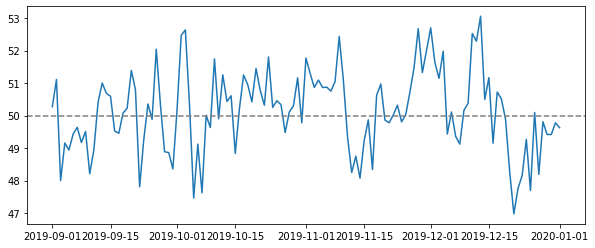

In [520]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.axhline(mu, linestyle='--', color='grey');

# ACF

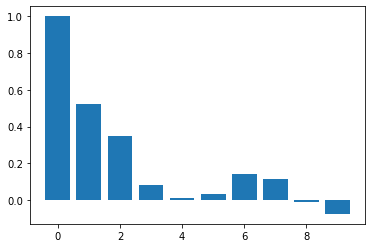

In [522]:
acf_vals = acf(series)
num_lags = 10
plt.bar(range(num_lags), acf_vals[:num_lags]);

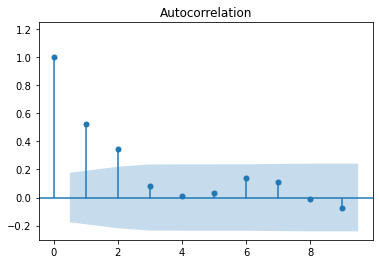

In [523]:
plot_acf(series, lags=9, auto_ylims=True);

# PACF

<BarContainer object of 21 artists>

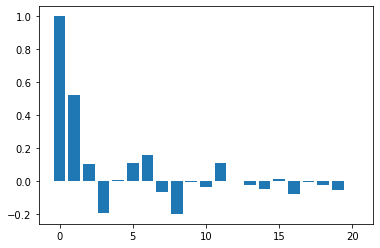

In [524]:
pacf_vals = pacf(series)
num_lags = 21
plt.bar(range(num_lags), pacf_vals[:num_lags])

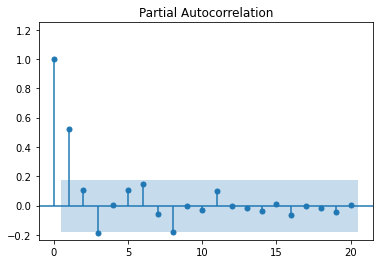

In [525]:
plot_pacf(series, lags=20, method='ywm', auto_ylims=True);

# Get training and testing sets

In [526]:
train_end = datetime(2019,12,30)
test_end = datetime(2020,1,1)

train_data = series[:train_end]
test_data = series[train_end + timedelta(days=1):test_end]

In [527]:
test_data

2019-12-31    49.777239
2020-01-01    49.627839
Freq: D, dtype: float64

# Fit ARIMA Model

In [528]:
#create the model
model = ARIMA(train_data, order=(0,0,2))

In [529]:
#fit the model
model_fit = model.fit()

In [530]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -178.809
Date:                Wed, 31 Aug 2022   AIC                            365.617
Time:                        09:57:41   BIC                            376.800
Sample:                    09-01-2019   HQIC                           370.159
                         - 12-30-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1493      0.175    286.586      0.000      49.806      50.492
ma.L1          0.4219      0.090      4.693      0.000       0.246       0.598
ma.L2          0.3579      0.096      3.709      0.0

# Predicted Model:
# $\hat{y}_t = 50.1 + 0.42\varepsilon_{t-1} + 0.36\varepsilon_{t-2}$

In [531]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [532]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)

In [533]:
residuals = test_data - predictions

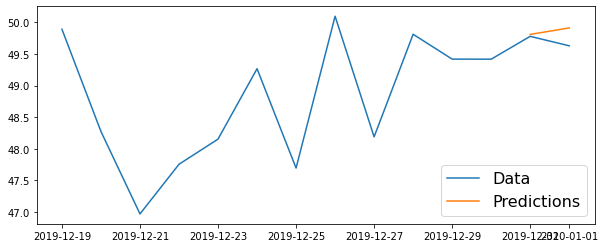

In [534]:
plt.figure(figsize=(10,4))

plt.plot(series[-14:])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16);

In [535]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.0031


In [536]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 0.2005937318102324
